In [469]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
warnings.filterwarnings('ignore')

In [470]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [471]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [472]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [473]:
df.duplicated().sum()

1

In [474]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [475]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [476]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [477]:
df.columns = ['age', 'gender', 'bmi', 'child', 'smoker', 'region', 'charges']
df

,age,gender,bmi,child,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [478]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

In [479]:
df['charges'].min()

1121.8739

In [480]:
df['charges'].describe()

count     1337.000000
mean     13279.121487
std      12110.359656
min       1121.873900
25%       4746.344000
50%       9386.161300
75%      16657.717450
max      63770.428010
Name: charges, dtype: float64

In [481]:
female = df[df['gender']=='female']
male = df[df['gender']=='male']

In [482]:
female.shape[0]

662

In [483]:
male.shape[0]

675

In [484]:
df['child'].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [485]:
df['child'].value_counts()

child
0    573
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [486]:
df[df['gender']=='female'].describe()

,age,bmi,child,charges
count,662.000000,662.000000,662.000000,662.000000
mean,39.503021,30.377749,1.074018,12569.578844
std,14.054223,6.046023,1.192115,11128.703801
min,18.000000,16.815000,0.000000,1607.510100
25%,27.000000,26.125000,0.000000,4885.158700
50%,40.000000,30.107500,1.000000,9412.962500
75%,51.750000,34.313750,2.000000,14454.691825
max,64.000000,48.070000,5.000000,63770.428010


In [487]:
df[df['gender']=='male'].describe()

,age,bmi,child,charges
count,675.000000,675.000000,675.000000,675.000000
mean,38.946667,30.943652,1.117037,13974.998864
std,14.039584,6.144973,1.219132,12971.958663
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.410000,0.000000,4654.022675
50%,39.000000,30.690000,1.000000,9377.904700
75%,51.000000,35.025000,2.000000,19006.685500
max,64.000000,53.130000,5.000000,62592.873090


In [488]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

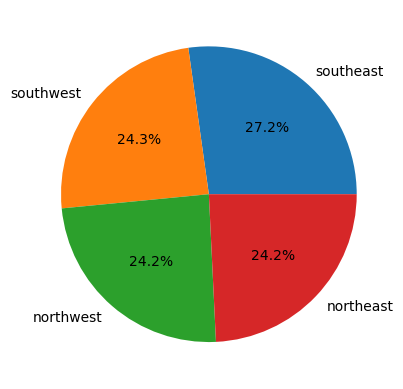

In [489]:
region = df['region'].value_counts()
plt.pie(region, labels=region.index, autopct='%1.1f%%')
plt.show()

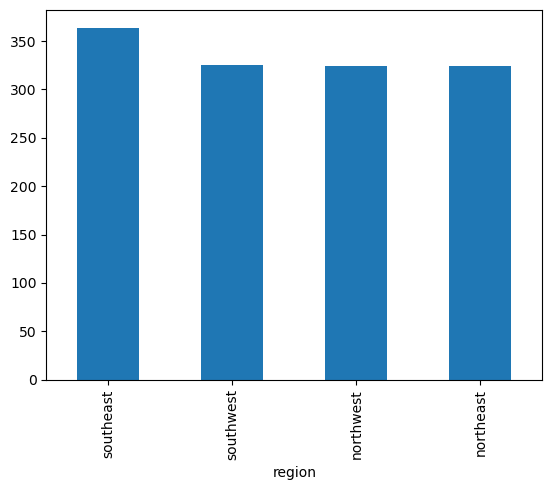

In [490]:
region.plot(kind='bar')
plt.show()

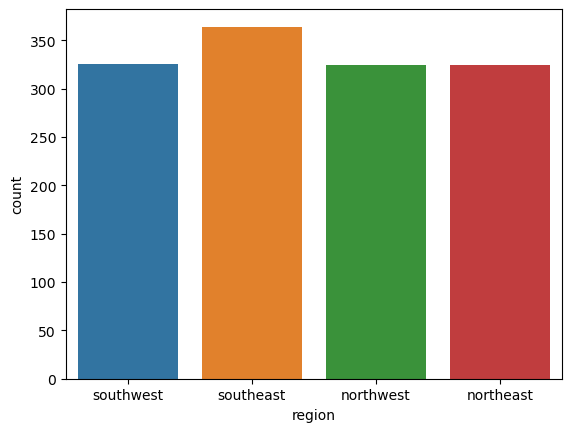

In [491]:
sns.countplot(x='region', data=df)
plt.show()

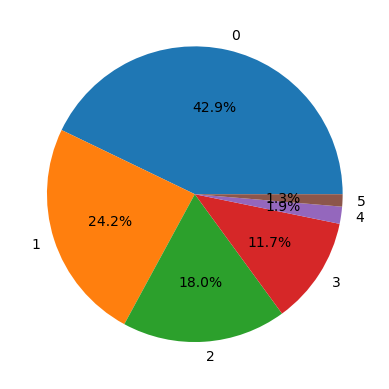

In [492]:
child = df['child'].value_counts()
plt.pie(child, labels=child.index, autopct='%1.1f%%')
plt.show()

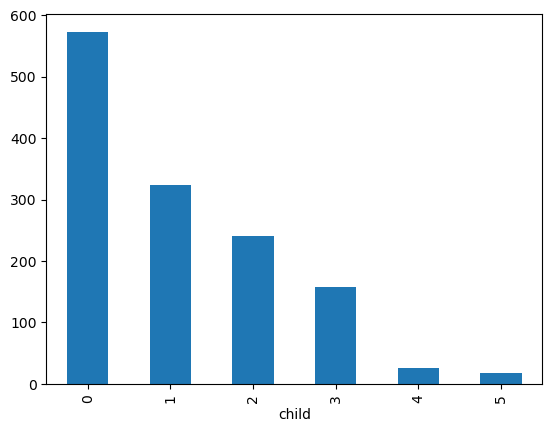

In [493]:
child.plot(kind='bar')
plt.show()

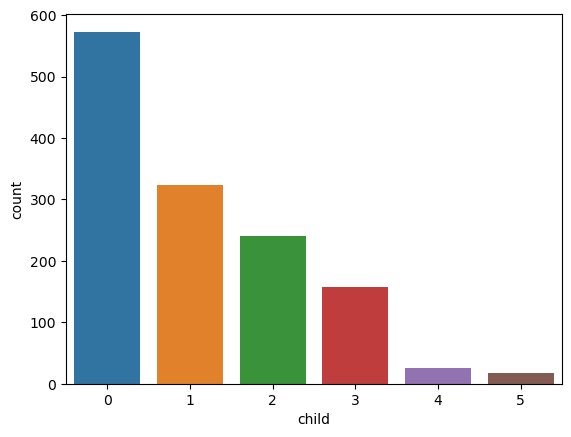

In [494]:
sns.countplot(x='child', data=df)
plt.show()

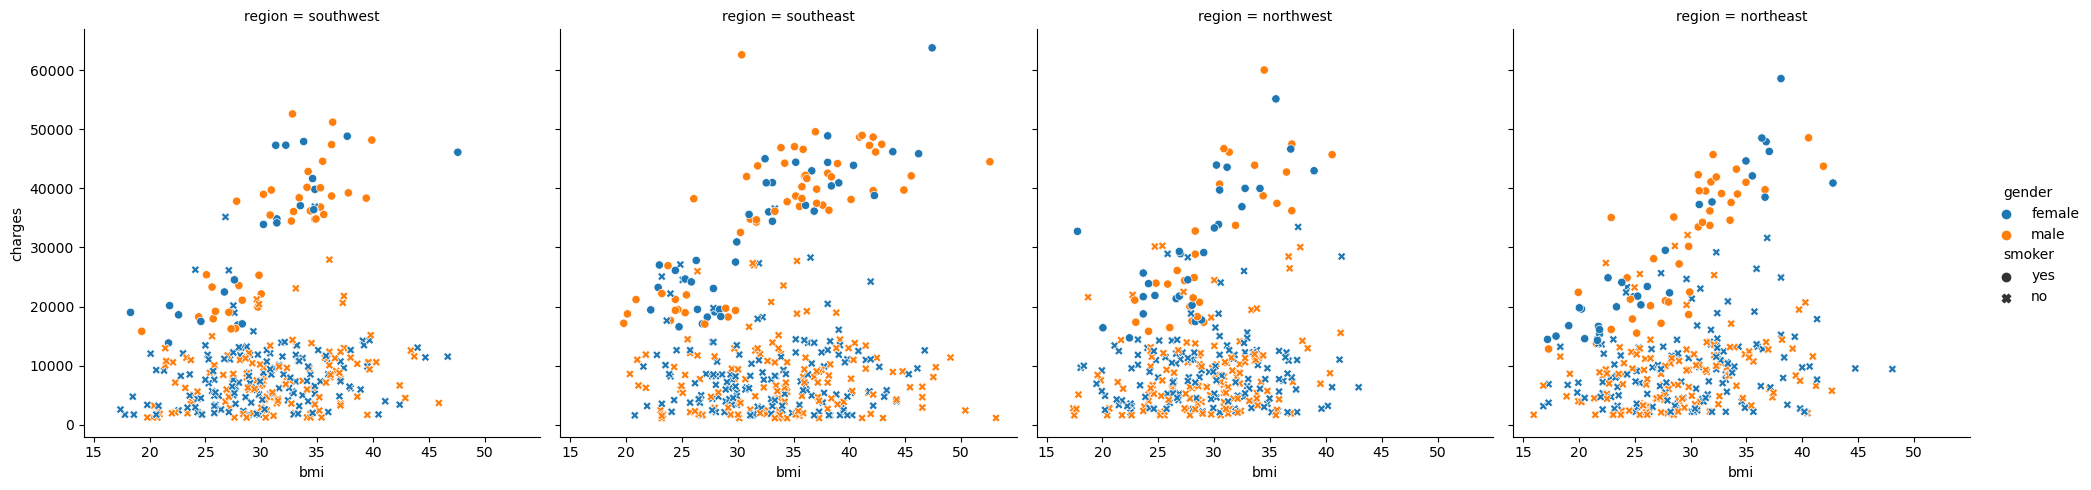

In [495]:
sns.relplot(x='bmi', y='charges',hue='gender',style='smoker', data=df,col='region')
plt.show()

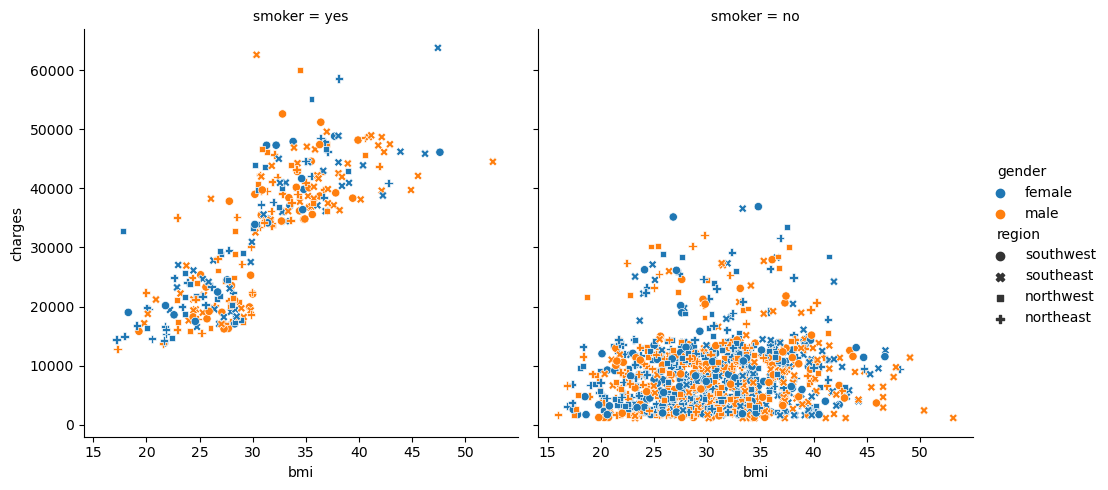

In [496]:
sns.relplot(x='bmi', y='charges',hue='gender',style='region', data=df,col='smoker')
plt.show()

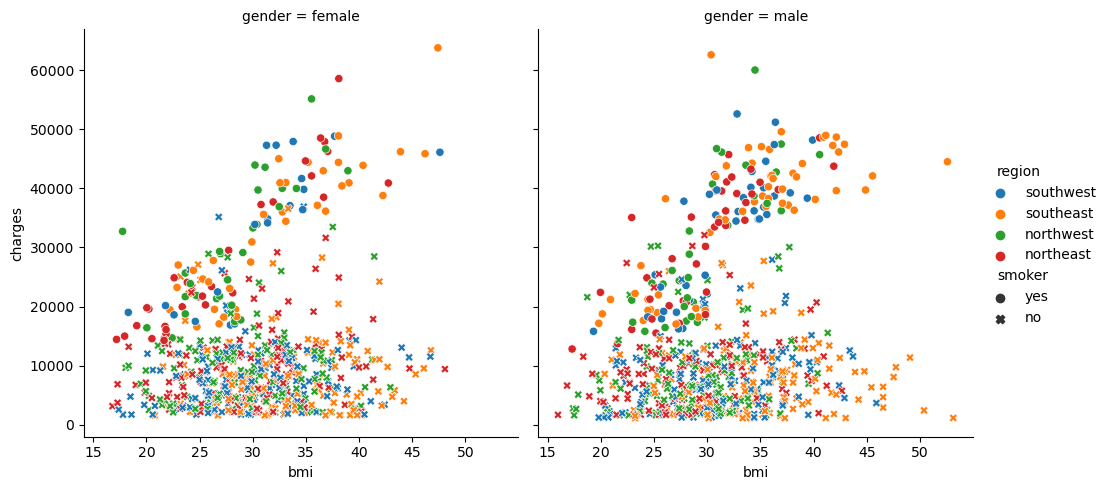

In [497]:
sns.relplot(x='bmi', y='charges',hue='region',style='smoker', data=df,col='gender')
plt.show()

In [498]:
min_children = df['child'].min()
max_children = df['child'].max()
mean_children = df['child'].mean()

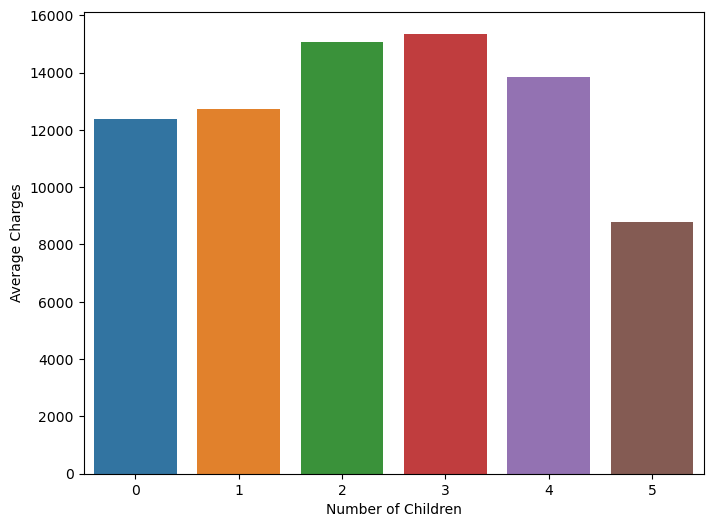

In [499]:
mean_charges = df.groupby('child')['charges'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='child', y='charges', data=mean_charges)
plt.xlabel('Number of Children')
plt.ylabel('Average Charges')
plt.show()

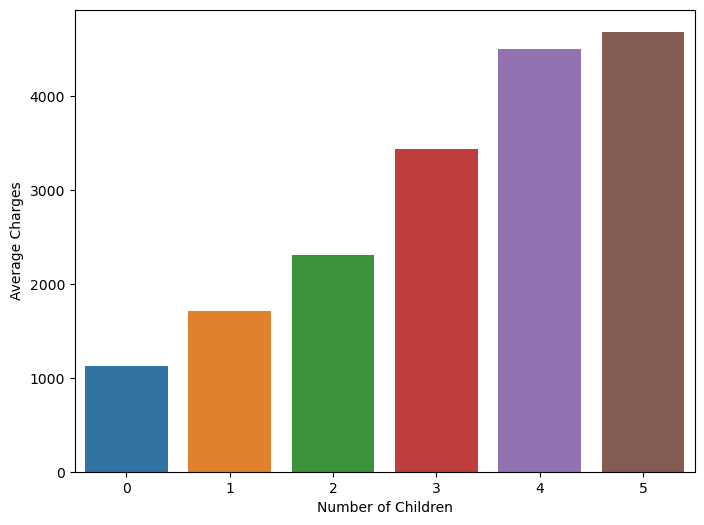

In [500]:
min_charges = df.groupby('child')['charges'].min().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='child', y='charges', data=min_charges)
plt.xlabel('Number of Children')
plt.ylabel('Average Charges')
plt.show()

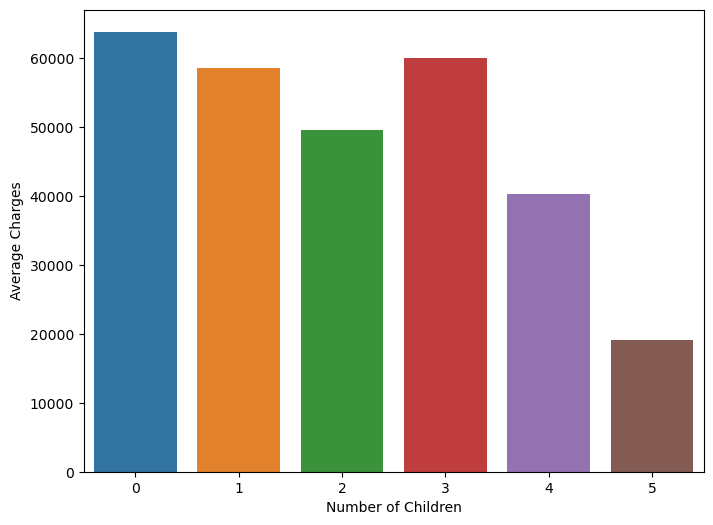

In [501]:
max_charges = df.groupby('child')['charges'].max().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='child', y='charges', data=max_charges)
plt.xlabel('Number of Children')
plt.ylabel('Average Charges')
plt.show()

In [502]:
df.select_dtypes(include='O')

,gender,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


In [503]:
df2 = pd.get_dummies(df,drop_first='if_binary').astype(int)

In [504]:
df2.head()

,age,bmi,child,charges,gender_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27,0,16884,0,1,0,0,1
1,18,33,1,1725,1,0,0,1,0
2,28,33,3,4449,1,0,0,1,0
3,33,22,0,21984,1,0,1,0,0
4,32,28,0,3866,1,0,1,0,0


In [505]:
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder,OrdinalEncoder

In [506]:
cat_col = df.select_dtypes(include='O')

In [507]:
obj = OneHotEncoder()
obj.fit_transform(cat_col).toarray()

array([[1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       ...,
       [1., 0., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.]])

In [508]:
x = df2.drop('charges',axis=1)
y = df2[['charges']]

In [509]:
from sklearn.model_selection import train_test_split

In [510]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10)

In [511]:
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
lnr = LinearRegression()
dtr = DecisionTreeRegressor()
rdr = RandomForestRegressor(min_samples_split=10,min_samples_leaf=3)

In [512]:
lnr.fit(x_train,y_train)
dtr.fit(x_train,y_train)
rdr.fit(x_train,y_train)

RandomForestRegressor(min_samples_leaf=3, min_samples_split=10)

In [513]:
print('LNR ,Training:',lnr.score(x_train,y_train)*100,' Testing:',lnr.score(x_test,y_test)*100)
print('DTR ,Training:',dtr.score(x_train,y_train)*100,' Testing:',dtr.score(x_test,y_test)*100)
print('RDR ,Training:',rdr.score(x_train,y_train)*100,' Testing:',rdr.score(x_test,y_test)*100)

LNR ,Training: 74.78783907491479  Testing: 77.61096093000775
DTR ,Training: 99.88558876372431  Testing: 56.30940134746994
RDR ,Training: 91.24501127638963  Testing: 85.7101531181957


In [514]:
joblib.dump(lnr,'linear_Regression.lb')
joblib.dump(dtr,'Descision_Regression.lb')
joblib.dump(rdr,'Random_Regression.lb')

['Random_Regression.lb']

In [515]:
from sklearn.svm import SVC,SVR
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor

In [516]:
lnr_pred = lnr.predict(x_test)
dtr_pred = dtr.predict(x_test)
rdr_pred = rdr.predict(x_test)

In [522]:
x_test.columns

Index(['age', 'bmi', 'child', 'gender_male', 'smoker_yes', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [518]:
compared_df = pd.concat([x_test,y_test],axis='columns')
compared_df['lnr_pred'] = lnr_pred
compared_df['dtr_pred'] = dtr_pred
compared_df['rdr_pred'] = rdr_pred

compared_df.head(40)

,age,bmi,child,gender_male,smoker_yes,region_northwest,region_southeast,region_southwest,charges,lnr_pred,dtr_pred,rdr_pred
665,43,38,2,1,1,0,1,0,42560,35997.859611,48885.0,44931.390420
350,57,23,0,0,0,1,0,0,11830,10383.185262,12029.0,11849.946599
1231,20,21,0,0,1,0,0,1,20167,23145.741162,14711.0,14956.081400
1050,44,36,1,0,0,1,0,0,8023,12001.619160,12797.0,10600.212036
1097,22,33,0,1,0,0,1,0,1674,3961.838304,16586.0,2960.532342
134,20,28,0,0,0,0,0,0,2457,2655.657340,2257.0,2413.501703
541,20,31,2,0,0,0,1,0,3056,3863.147462,24059.0,7674.783129
886,57,28,0,1,1,0,0,0,27218,36027.732449,26109.0,28435.480609
907,44,32,1,0,0,0,1,0,7633,9977.870763,7147.0,9323.978560
1042,20,30,0,1,1,0,0,0,33475,27036.760614,32548.0,33432.915527


In [519]:
import os
os.makedirs('prediction',exist_ok=True)

In [520]:
compared_df.to_csv('./prediction/prediction.csv', index=False)